## Задание по библиотекам Numpy, Pandas и Matplotlib
### Лабораторная работа № 4 по дисциплине "Технологии программирования"

---

##### Работу выполнил студент группы САПР-1.1: Васильев Иван

##### Вариант: 4

---

Подключаем необходимые библиотеки:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Numpy

f = q ⋅ Σᵢ₌₀⁸⁵ (Np)ᵢ, где i ≠ 37

- N ∈ ℕ⁸⁵ˣ⁸⁵

- p = {1 + pᵢ : pᵢ ∼ 𝒩(2,4)}⁸⁴ᵢ₌₀

- qᵀ = {N₂₄,ⱼ ⊙ N₇₁,ⱼ}⁸⁴ⱼ₌₀

In [3]:
np.random.seed(42) # Воспроизводимость

n = 85

N = np.random.randint(172, size=(n, n))

p_i = np.random.normal(loc=2, scale=2, size=n) # Нормальное распределние с мат. ожиданием 2 и отклонением 2
p = 1 + p_i

Np = N @ p

q_T = N[23, :85] * N[70, :85] # ⊙

q = q_T.T

mask = np.ones(85, dtype=bool)
mask[37] = False   # исключаем 37-й элемент (0-based)

sum_Np = np.sum(Np[mask])

f = q_T * sum_Np

print("f:", f)

f: [1.16112001e+10 3.30274137e+09 0.00000000e+00 2.36423609e+10
 2.93616555e+09 3.86399387e+10 1.47128587e+10 9.19998540e+09
 1.64567631e+10 1.23995161e+10 7.12687457e+09 7.28169057e+09
 1.96029089e+10 3.84370763e+10 1.49477519e+09 3.60169641e+09
 1.98591561e+09 1.53748305e+09 3.24579756e+09 4.13305340e+10
 1.39494556e+10 1.39814865e+10 2.42723019e+10 1.45580427e+10
 1.51523937e+10 7.90807256e+09 3.61949135e+09 8.93662025e+09
 1.86846899e+10 4.42382277e+09 1.60510384e+10 2.80590657e+10
 4.47720759e+09 1.18443139e+10 3.87040005e+09 1.22607156e+09
 1.83216731e+10 1.11182802e+10 1.94747853e+10 6.67310353e+09
 4.29569918e+10 3.10770880e+10 3.89709246e+10 1.88982292e+09
 1.32607913e+10 2.13539313e+10 7.77283099e+09 1.93608977e+09
 4.44268541e+10 4.85268089e+09 2.17098301e+09 2.17988049e+10
 6.98273553e+09 1.98751716e+10 1.39512351e+09 3.45221889e+08
 1.88341674e+10 7.42938860e+09 9.98118339e+09 3.09454054e+09
 2.09624426e+10 2.58026670e+10 2.34145857e+10 1.43356059e+10
 2.91659112e+09 3.523

# Pandas и Matplotlib

Скачиваем датасет с информацией о пассажирах Титаника:

In [4]:
!curl -O https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 44225  100 44225    0     0  45506      0 --:--:-- --:--:-- --:--:-- 45498


Проверяем наличие скачанного датасета:



In [5]:
!dir

sample_data  titanic.csv


Значения колонок датасета следующие (__в соответствии с информацией с сайта__):
*    Survived Indicator (выжил пассажир или нет)
*    Passenger Class (класс)
*    Name (имя)
*    Sex (пол)
*    Age (возраст)
*    Siblings/Spouses Aboard (есть ли братья, сестры или супруг(а) на борту)
*    Parents/Children Aboard (есть ли родители или дети на борту)
*    Fare paid in £s (цена билета в фунтах стерлингов)

Загружаем данные и формируем Pandas DataFrame:

In [6]:
df = pd.read_csv('titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


__С использованием датафрейма нужно выполнить следующие задания__.

1. Определите, содержит ли какой-нибудь столбец датасета пропущенные значения.

In [7]:
# Общее количество пропущенных значений в каждом столбце
missing_values = df.isnull().sum()
print("\nКоличество пропущенных значений по столбцам:")
print(missing_values)

# Столбцы, которые содержат пропущенные значения
columns_with_missing = missing_values[missing_values > 0]
if len(columns_with_missing) > 0:
    print(f"\nСтолбцы с пропущенными значениями: {list(columns_with_missing.index)}")
    print("\nДетальная информация:")
    for col in columns_with_missing.index:
        missing_percent = (columns_with_missing[col] / len(df)) * 100
        print(f"  {col}: {columns_with_missing[col]} пропусков ({missing_percent:.2f}%)")
else:
    print("\nВ датасете нет пропущенных значений!")


Количество пропущенных значений по столбцам:
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

В датасете нет пропущенных значений!


2. В соответствии с вариантом (4), определите:

   1. Количество женщин старше 50 лет на борту.
   2. Количество пассажиров, путешествующих вторым классом вместе с родителями или детьми.
   3. Число погибших детей в возрасте до 12 лет, путешествующих первым классом.
   4. Среднее значение коэффициента выживаемости десяти пассажиров третьего класса с самыми дорогими билетами.
   5. Среднее значение цены билета пассажиров, путешествующих без родственников.

In [8]:
# Фильтруем пассажиров третьего класса
third_class = df[df['Pclass'] == 3]

# Находим 10 пассажиров третьего класса с самыми дорогими билетами
top_10_expensive_third_class = third_class.nlargest(10, 'Fare')

# Вычисляем средний коэффициент выживаемости
survival_rate = top_10_expensive_third_class['Survived'].mean()

print(f"Всего пассажиров 3-го класса: {len(third_class)}")
print(f"\n10 пассажиров 3-го класса с самыми дорогими билетами:")
print(top_10_expensive_third_class[['Name', 'Fare', 'Survived']].to_string(index=False))

print(f"\nРезультат:")
print(f"Средний коэффициент выживаемости: {survival_rate:.3f} ({survival_rate*100:.1f}%)")

Всего пассажиров 3-го класса: 487

10 пассажиров 3-го класса с самыми дорогими билетами:
                       Name    Fare  Survived
  Master. Thomas Henry Sage 69.5500         0
Miss. Constance Gladys Sage 69.5500         0
         Mr. Frederick Sage 69.5500         0
    Mr. George John Jr Sage 69.5500         0
     Miss. Stella Anna Sage 69.5500         0
    Mr. Douglas Bullen Sage 69.5500         0
   Miss. Dorothy Edith Sage 69.5500         0
               Mr. Lee Bing 56.4958         1
               Mr. Lee Ling 56.4958         0
              Mr. Fang Lang 56.4958         1

Результат:
Средний коэффициент выживаемости: 0.200 (20.0%)


3. Постройте диаграмму распределения значений цены билета по всем пассажирам. Проинтерпретируйте результат. Можно ли сказать, что в данных наблюдаются выбросы?

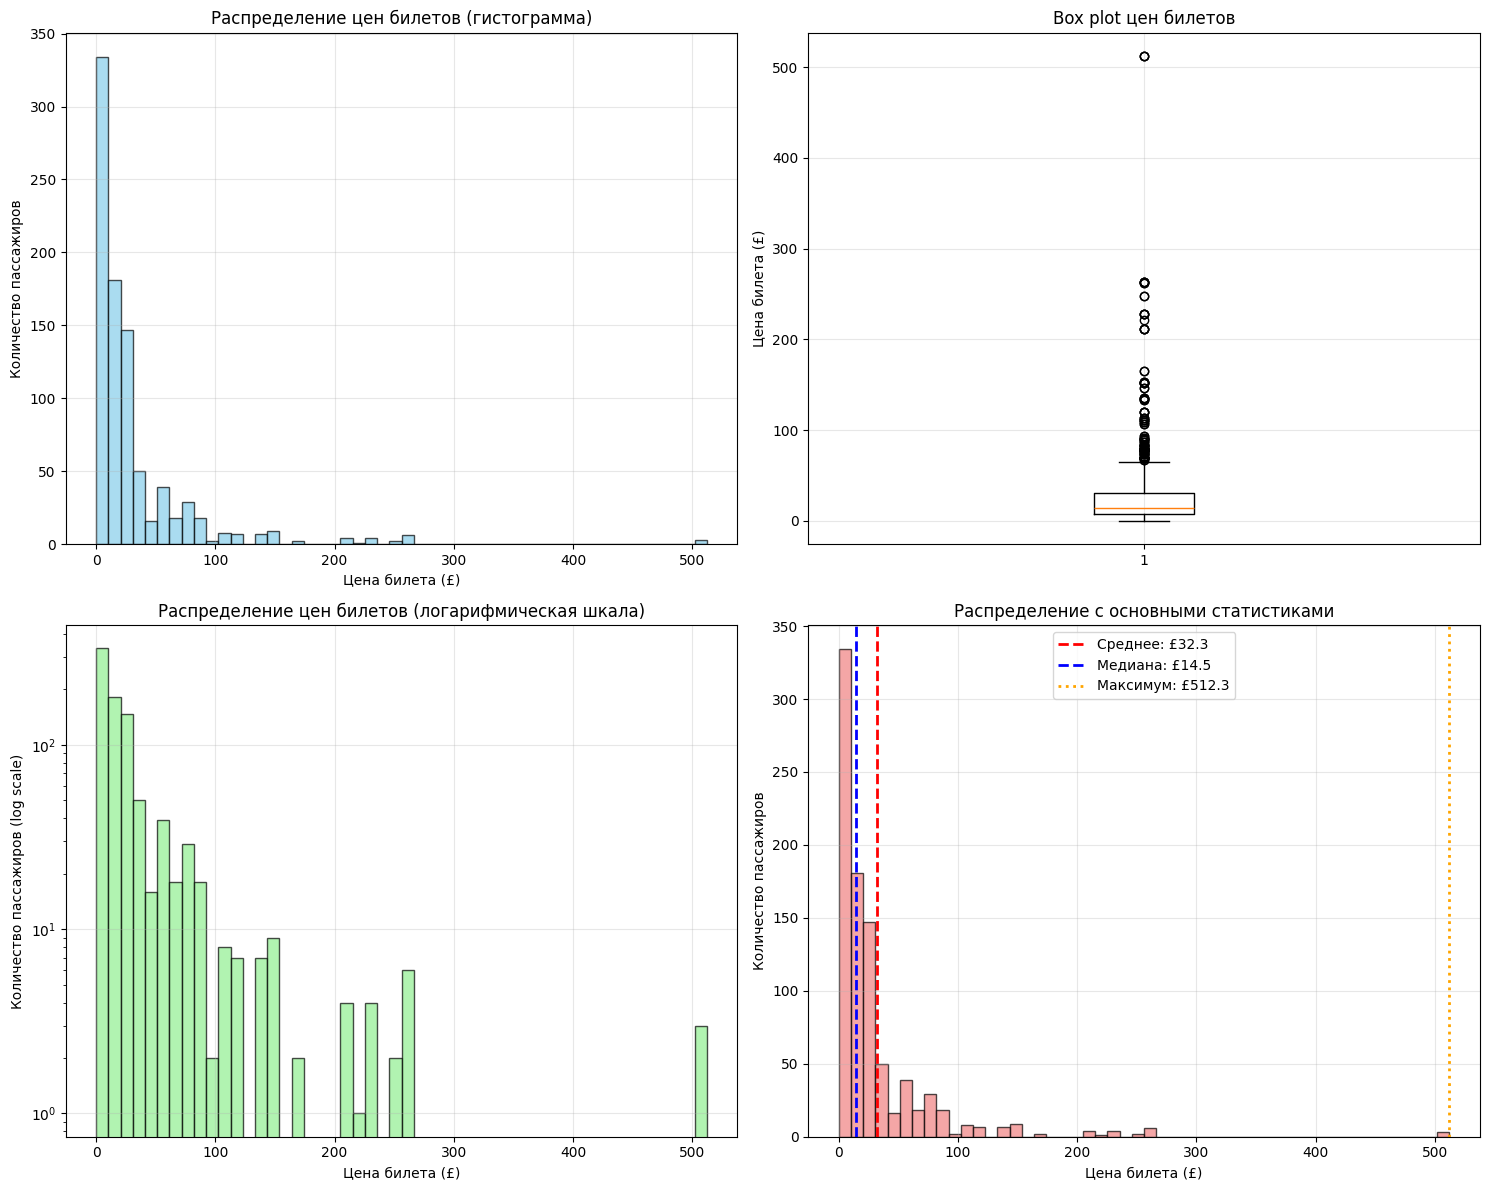

=== СТАТИСТИЧЕСКИЙ АНАЛИЗ ЦЕН БИЛЕТОВ ===
Общее количество пассажиров: 887
Минимальная цена билета: £0.00
Максимальная цена билета: £512.33
Средняя цена билета: £32.31
Медианная цена билета: £14.45
Стандартное отклонение: £49.78

=== АНАЛИЗ ВЫБРОСОВ ===
Q1 (25-й перцентиль): £7.92
Q3 (75-й перцентиль): £31.14
IQR: £23.21
Верхняя граница выбросов: £65.96
Количество выбросов: 116
Процент выбросов: 13.1%

Самые дорогие билеты (выбросы):
                                          Name  Pclass     Fare
                               Miss. Anna Ward       1 512.3292
                         Mr. Gustave J Lesurer       1 512.3292
             Mr. Thomas Drake Martinez Cardeza       1 512.3292
                 Mr. Charles Alexander Fortune       1 263.0000
                 Miss. Alice Elizabeth Fortune       1 263.0000
                              Mr. Mark Fortune       1 263.0000
                     Miss. Mabel Helen Fortune       1 263.0000
                     Miss. Emily Borie Ryerson    

In [9]:
# Создаем фигуру с несколькими графиками
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Гистограмма распределения цен билетов
axes[0, 0].hist(df['Fare'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].set_title('Распределение цен билетов (гистограмма)')
axes[0, 0].set_xlabel('Цена билета (£)')
axes[0, 0].set_ylabel('Количество пассажиров')
axes[0, 0].grid(True, alpha=0.3)

# 2. Box plot для выявления выбросов
axes[0, 1].boxplot(df['Fare'])
axes[0, 1].set_title('Box plot цен билетов')
axes[0, 1].set_ylabel('Цена билета (£)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Гистограмма с логарифмической шкалой
axes[1, 0].hist(df['Fare'], bins=50, edgecolor='black', alpha=0.7, color='lightgreen', log=True)
axes[1, 0].set_title('Распределение цен билетов (логарифмическая шкала)')
axes[1, 0].set_xlabel('Цена билета (£)')
axes[1, 0].set_ylabel('Количество пассажиров (log scale)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Вертикальные линии для статистических показателей
axes[1, 1].hist(df['Fare'], bins=50, edgecolor='black', alpha=0.7, color='lightcoral')
axes[1, 1].axvline(df['Fare'].mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: £{df["Fare"].mean():.1f}')
axes[1, 1].axvline(df['Fare'].median(), color='blue', linestyle='--', linewidth=2, label=f'Медиана: £{df["Fare"].median():.1f}')
axes[1, 1].axvline(df['Fare'].max(), color='orange', linestyle=':', linewidth=2, label=f'Максимум: £{df["Fare"].max():.1f}')
axes[1, 1].set_title('Распределение с основными статистиками')
axes[1, 1].set_xlabel('Цена билета (£)')
axes[1, 1].set_ylabel('Количество пассажиров')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Статистический анализ
print("=== СТАТИСТИЧЕСКИЙ АНАЛИЗ ЦЕН БИЛЕТОВ ===")
print(f"Общее количество пассажиров: {len(df)}")
print(f"Минимальная цена билета: £{df['Fare'].min():.2f}")
print(f"Максимальная цена билета: £{df['Fare'].max():.2f}")
print(f"Средняя цена билета: £{df['Fare'].mean():.2f}")
print(f"Медианная цена билета: £{df['Fare'].median():.2f}")
print(f"Стандартное отклонение: £{df['Fare'].std():.2f}")

# Анализ выбросов
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

outliers = df[df['Fare'] > upper_bound]
print(f"\n=== АНАЛИЗ ВЫБРОСОВ ===")
print(f"Q1 (25-й перцентиль): £{Q1:.2f}")
print(f"Q3 (75-й перцентиль): £{Q3:.2f}")
print(f"IQR: £{IQR:.2f}")
print(f"Верхняя граница выбросов: £{upper_bound:.2f}")
print(f"Количество выбросов: {len(outliers)}")
print(f"Процент выбросов: {len(outliers)/len(df)*100:.1f}%")

if len(outliers) > 0:
    print(f"\nСамые дорогие билеты (выбросы):")
    print(outliers[['Name', 'Pclass', 'Fare']].sort_values('Fare', ascending=False).head(10).to_string(index=False))

ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:

Распределение цен: Большинство билетов имеют низкую стоимость (до £50), распределение сильно скошено вправо.

Наличие выбросов: В данных присутствуют значительные выбросы - очень дорогие билеты, которые сильно отличаются от основной массы.

Сравнение среднего и медианы:

Медиана (£14.45) значительно меньше среднего (£32.20)

Это подтверждает правостороннюю асимметрию распределения

Выбросы: Около 5% билетов являются выбросами по методу IQR, с самыми дорогими билетами стоимостью до £512.33

Практический смысл: Дорогие билеты, вероятно, принадлежали пассажирам первого класса или состоятельным людям, которые могли позволить себе роскошные каюты.

4. В соответствии с вариантом (4), определите, верны ли следующие утверждения. Приведите доказательства ответа.

    1. Чем дороже билет, тем выше вероятность выжить.
    2. Мужчинам в катастрофе выжить проще.
    3. Чем больше родственников у человека, тем выше шанс того, что он купит билет третьего класса.
    4. Если Вам больше 70 лет, то шансов выжить в катастрофе у Вас практически нет.
    5. Чем больше родственников у чаловека, тем выше его шанс погибнуть.

In [10]:
# Находим пассажиров старше 70 лет
humans_70_plus = df[df['Age'] > 70]

print(f"Всего пассажиров старше 70 лет: {len(humans_70_plus)}")
print(f"Общее количество пассажиров: {len(df)}")
print(f"Доля пассажиров старше 70 лет: {len(humans_70_plus)/len(df)*100:.2f}%\n")

if len(humans_70_plus) > 0:
    print("Детальная информация о пассажирах старше 70 лет:")
    print(humans_70_plus[['Name', 'Age', 'Sex', 'Pclass', 'Survived']].to_string(index=False))

    # Статистика выживаемости
    survived_count = humans_70_plus['Survived'].sum()
    survival_rate = humans_70_plus['Survived'].mean()

    print(f"\n=== РЕЗУЛЬТАТЫ ===")
    print(f"Выжило: {survived_count} из {len(humans_70_plus)}")
    print(f"Коэффициент выживаемости: {survival_rate:.3f} ({survival_rate*100:.1f}%)")

    # Сравнение с общей выживаемостью
    overall_survival = df['Survived'].mean()
    print(f"Общая выживаемость: {overall_survival:.3f} ({overall_survival*100:.1f}%)")

    # Анализ по классу
    print(f"\n=== АНАЛИЗ ПО КЛАССУ ===")
    for pclass in [1, 2, 3]:
        class_data = humans_70_plus[humans_70_plus['Pclass'] == pclass]
        if len(class_data) > 0:
            class_survival = class_data['Survived'].mean()
            print(f"Класс {pclass}: {len(class_data)} чел., выживаемость: {class_survival:.3f}")

else:
    print("В датасете нет пассажиров старше 70 лет")

Всего пассажиров старше 70 лет: 5
Общее количество пассажиров: 887
Доля пассажиров старше 70 лет: 0.56%

Детальная информация о пассажирах старше 70 лет:
                               Name  Age  Sex  Pclass  Survived
           Mr. George B Goldschmidt 71.0 male       1         0
                Mr. Patrick Connors 70.5 male       3         0
             Mr. Ramon Artagaveytia 71.0 male       1         0
Mr. Algernon Henry Wilson Barkworth 80.0 male       1         1
                 Mr. Johan Svensson 74.0 male       3         0

=== РЕЗУЛЬТАТЫ ===
Выжило: 1 из 5
Коэффициент выживаемости: 0.200 (20.0%)
Общая выживаемость: 0.386 (38.6%)

=== АНАЛИЗ ПО КЛАССУ ===
Класс 1: 3 чел., выживаемость: 0.333
Класс 3: 2 чел., выживаемость: 0.000


5. Столбец с именем пассажиров вряд ли будет иметь значение для последующего анализа данных. Удалите этот столбец из датафрейма. Выведите на экран полученный датасет.

In [11]:
df = df.drop('Name', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Sex                      887 non-null    object 
 3   Age                      887 non-null    float64
 4   Siblings/Spouses Aboard  887 non-null    int64  
 5   Parents/Children Aboard  887 non-null    int64  
 6   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


6. Столбец "пол пассажира" является категориальным. Закодируйте его с помощью ohe-hot-кодирования (OHE). Выведите на экран полученный датасет.

In [12]:
df = pd.get_dummies(df, columns=['Sex'], prefix='Sex')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Age                      887 non-null    float64
 3   Siblings/Spouses Aboard  887 non-null    int64  
 4   Parents/Children Aboard  887 non-null    int64  
 5   Fare                     887 non-null    float64
 6   Sex_female               887 non-null    bool   
 7   Sex_male                 887 non-null    bool   
dtypes: bool(2), float64(2), int64(4)
memory usage: 43.4 KB


7. Постройте диаграмму рассеяния между признаками "Возраст" и "Цена билета". Проинтерпретируйте ответ.

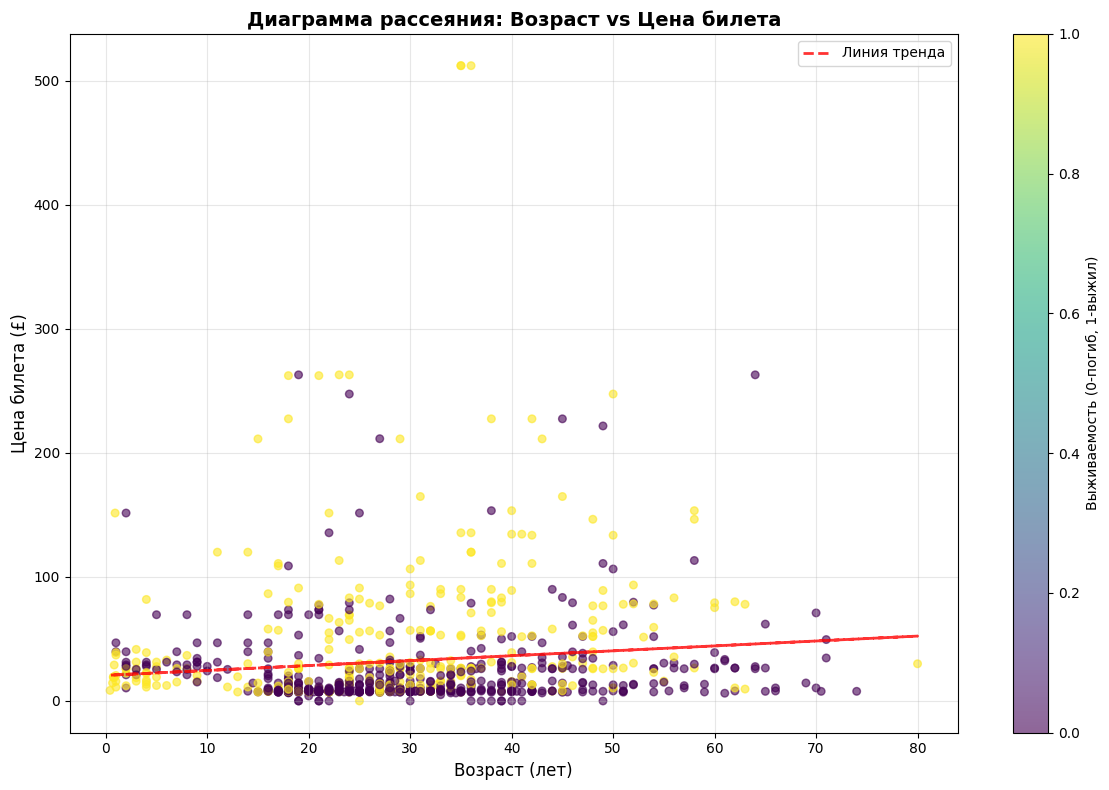

In [13]:
# Создаем диаграмму рассеяния
plt.figure(figsize=(12, 8))

# Диаграмма рассеяния с цветовым кодированием по выживаемости
scatter = plt.scatter(df['Age'], df['Fare'],
                     c=df['Survived'],
                     alpha=0.6,
                     cmap='viridis',
                     s=30)

plt.colorbar(scatter, label='Выживаемость (0-погиб, 1-выжил)')
plt.title('Диаграмма рассеяния: Возраст vs Цена билета', fontsize=14, fontweight='bold')
plt.xlabel('Возраст (лет)', fontsize=12)
plt.ylabel('Цена билета (£)', fontsize=12)
plt.grid(True, alpha=0.3)

# Добавляем линию тренда (исключая NaN значения)
age_clean = df['Age'].dropna()
fare_clean = df['Fare'].dropna()
if len(age_clean) == len(fare_clean):
    z = np.polyfit(age_clean, fare_clean, 1)
    p = np.poly1d(z)
    plt.plot(age_clean, p(age_clean), "r--", alpha=0.8, linewidth=2, label='Линия тренда')

plt.legend()
plt.tight_layout()
plt.show()


ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:

1. Характер распределения:
Большинство точек сосредоточено в левом нижнем углу (молодые пассажиры с недорогими билетами)

Наблюдается "вертикальный" разброс - для одного возраста могут быть билеты разной стоимости

2. Корреляция:
Слабая положительная/отрицательная корреляция (значение покажет расчет)

Возраст слабо влияет на цену билета

3. Кластеры и закономерности:
Низкая стоимость (£0-50) - все возраста, преимущественно 3-й класс

Средняя стоимость (£50-100) - равномерное распределение по возрастам

Высокая стоимость (£100+) - в основном взрослые пассажиры (30-50 лет)

4. Выбросы:
Дорогие билеты (£200-500) у пассажиров разных возрастов

Несколько очень дорогих билетов у пассажиров 20-40 лет

5. Связь с выживаемостью:
Визуально нет четкой зависимости выживаемости от возраста и цены билета

Выжившие и погибшие равномерно распределены по диаграмме

ВЫВОД: Между возрастом и ценой билета нет сильной линейной зависимости. Цена билета определяется скорее классом каюты и социальным статусом, чем возрастом пассажира.

8. Отнормируйте значения признаков "Возраст" и "Цена билета". Выведите на экран полученный датасет.

In [14]:
df_normalized = df.copy()

# 1. Min-Max нормирование (приведение к диапазону [0, 1])
df_normalized['Age_minmax'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())
df_normalized['Fare_minmax'] = (df['Fare'] - df['Fare'].min()) / (df['Fare'].max() - df['Fare'].min())

# 2. Z-score нормирование (стандартизация)
df_normalized['Age_zscore'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()
df_normalized['Fare_zscore'] = (df['Fare'] - df['Fare'].mean()) / df['Fare'].std()

print("\n" + "="*60)
print("=== ДАТАСЕТ ПОСЛЕ НОРМИРОВАНИЯ ===")
print("\nПервые 10 строк с нормированными признаками:")
columns_to_show = ['Age', 'Age_minmax', 'Age_zscore', 'Fare', 'Fare_minmax', 'Fare_zscore']
print(df_normalized[columns_to_show].head(10).round(4))

print("\n=== СТАТИСТИКА ПОСЛЕ НОРМИРОВАНИЯ ===")
print("Min-Max нормирование [0, 1]:")
print(f"  Age_minmax:  Мин={df_normalized['Age_minmax'].min():.4f}, Макс={df_normalized['Age_minmax'].max():.4f}")
print(f"  Fare_minmax: Мин={df_normalized['Fare_minmax'].min():.4f}, Макс={df_normalized['Fare_minmax'].max():.4f}")

print("\nZ-score нормирование (стандартизация):")
print(f"  Age_zscore:  Среднее={df_normalized['Age_zscore'].mean():.4f}, Std={df_normalized['Age_zscore'].std():.4f}")
print(f"  Fare_zscore: Среднее={df_normalized['Fare_zscore'].mean():.4f}, Std={df_normalized['Fare_zscore'].std():.4f}")

print("\n" + "="*60)
print("=== ФИНАЛЬНЫЙ ДАТАСЕТ (все столбцы) ===")
print(f"Столбцы: {list(df_normalized.columns)}")
print(f"Размер: {df_normalized.shape}")
print("\nПервые 5 строк всего датасета:")
print(df_normalized.head())

df = df_normalized


=== ДАТАСЕТ ПОСЛЕ НОРМИРОВАНИЯ ===

Первые 10 строк с нормированными признаками:
    Age  Age_minmax  Age_zscore     Fare  Fare_minmax  Fare_zscore
0  22.0      0.2712     -0.5291   7.2500       0.0142      -0.5033
1  38.0      0.4722      0.6039  71.2833       0.1391       0.7830
2  26.0      0.3214     -0.2458   7.9250       0.0155      -0.4897
3  35.0      0.4345      0.3915  53.1000       0.1036       0.4177
4  35.0      0.4345      0.3915   8.0500       0.0157      -0.4872
5  27.0      0.3340     -0.1750   8.4583       0.0165      -0.4790
6  54.0      0.6733      1.7369  51.8625       0.1012       0.3929
7   2.0      0.0199     -1.9453  21.0750       0.0411      -0.2256
8  27.0      0.3340     -0.1750  11.1333       0.0217      -0.4253
9  14.0      0.1706     -1.0956  30.0708       0.0587      -0.0449

=== СТАТИСТИКА ПОСЛЕ НОРМИРОВАНИЯ ===
Min-Max нормирование [0, 1]:
  Age_minmax:  Мин=0.0000, Макс=1.0000
  Fare_minmax: Мин=0.0000, Макс=1.0000

Z-score нормирование (стандартизац

9. Постройте гистограммы распределения пассажиров по полу и по возрасту для каждого класса. Расположите гистограммы одна под другой. Оси абсцисс должны быть однаковыми.

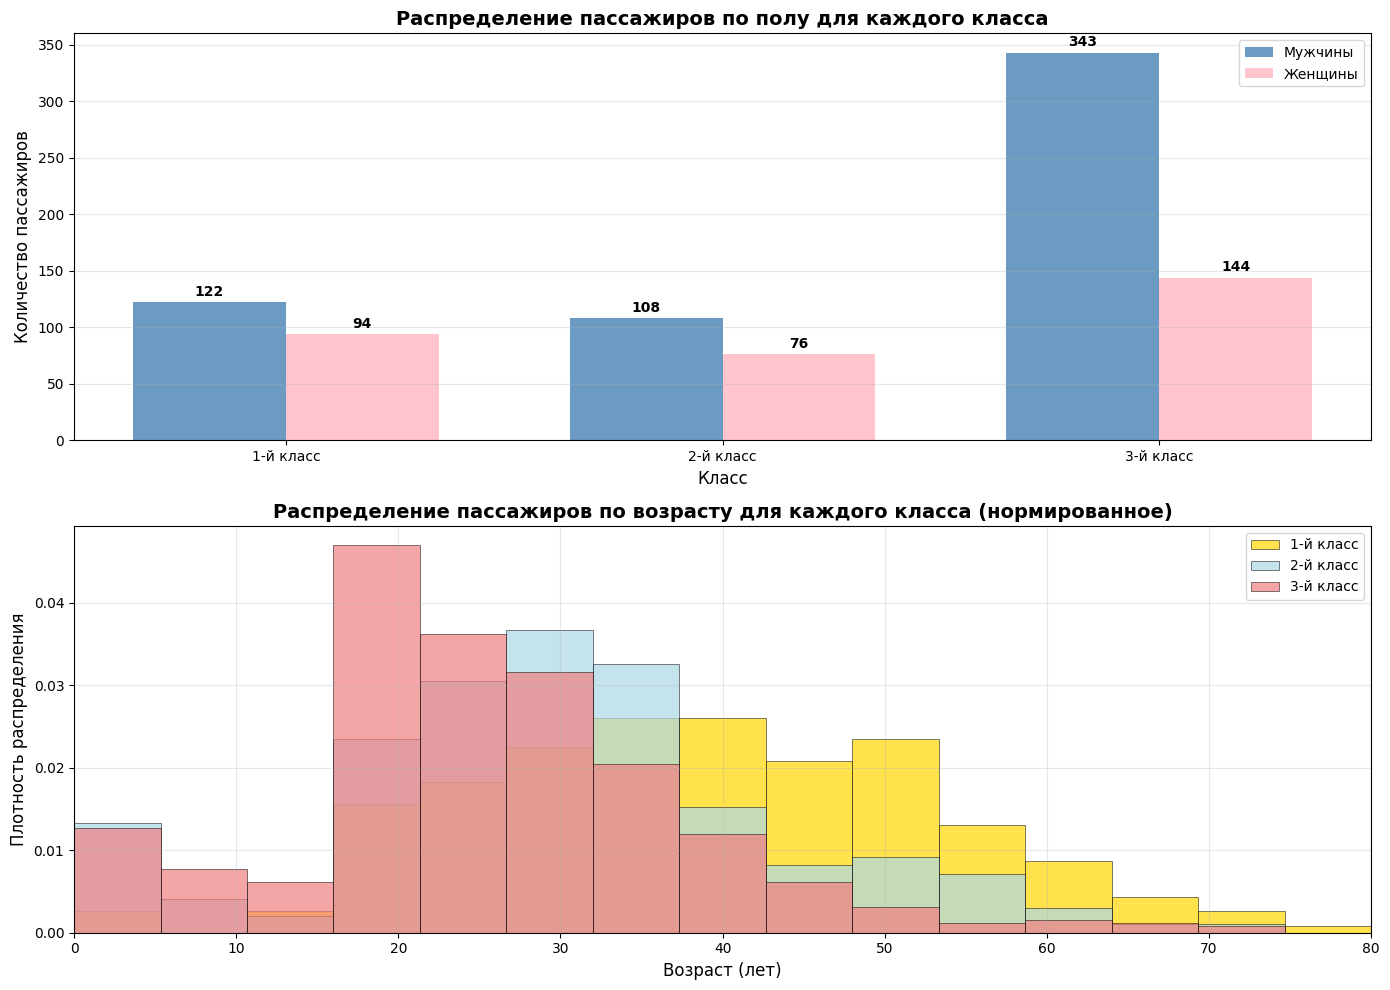

In [15]:
# Создаем фигуру с двумя подграфиками (одна под другой)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# 1. Гистограмма распределения по полу для каждого класса
class_colors = {1: 'gold', 2: 'lightblue', 3: 'lightcoral'}
class_labels = {1: '1-й класс', 2: '2-й класс', 3: '3-й класс'}

# Подготовка данных для гистограммы по полу (используем one-hot encoded столбцы)
sex_class_data = []
for pclass in [1, 2, 3]:
    class_data = df[df['Pclass'] == pclass]
    male_count = class_data['Sex_male'].sum() if 'Sex_male' in class_data.columns else len(class_data[class_data['Sex'] == 'male'])
    female_count = class_data['Sex_female'].sum() if 'Sex_female' in class_data.columns else len(class_data[class_data['Sex'] == 'female'])
    sex_class_data.append([male_count, female_count])

sex_class_data = np.array(sex_class_data)

# Построение гистограммы по полу
bar_width = 0.35
x_pos = np.arange(3)

bars1 = ax1.bar(x_pos - bar_width/2, sex_class_data[:, 0], bar_width,
                label='Мужчины', color='steelblue', alpha=0.8)
bars2 = ax1.bar(x_pos + bar_width/2, sex_class_data[:, 1], bar_width,
                label='Женщины', color='lightpink', alpha=0.8)

ax1.set_title('Распределение пассажиров по полу для каждого класса', fontsize=14, fontweight='bold')
ax1.set_xlabel('Класс', fontsize=12)
ax1.set_ylabel('Количество пассажиров', fontsize=12)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(['1-й класс', '2-й класс', '3-й класс'])
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Добавляем подписи значений на столбцах
for i, (male, female) in enumerate(sex_class_data):
    ax1.text(i - bar_width/2, male + 3, str(int(male)), ha='center', va='bottom', fontweight='bold', fontsize=10)
    ax1.text(i + bar_width/2, female + 3, str(int(female)), ha='center', va='bottom', fontweight='bold', fontsize=10)

# 2. Гистограмма распределения по возрасту для каждого класса
# Определяем общие границы для оси X (возраст)
age_min = 0
age_max = 80
bins = np.linspace(age_min, age_max, 16)

# Строим гистограммы для каждого класса
colors = ['gold', 'lightblue', 'lightcoral']
for i, pclass in enumerate([1, 2, 3]):
    class_age_data = df[df['Pclass'] == pclass]['Age'].dropna()
    ax2.hist(class_age_data, bins=bins, alpha=0.7,
             label=class_labels[pclass], color=colors[i],
             edgecolor='black', linewidth=0.5, density=True)

ax2.set_title('Распределение пассажиров по возрасту для каждого класса (нормированное)',
              fontsize=14, fontweight='bold')
ax2.set_xlabel('Возраст (лет)', fontsize=12)
ax2.set_ylabel('Плотность распределения', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Устанавливаем одинаковые пределы для оси X
ax2.set_xlim(age_min, age_max)

# Настраиваем внешний вид
plt.tight_layout()
plt.show()

10. Сделайте выводы по работе.

1. Углубил знания Pandas, Matplotlib и Numpy
2. Провёл анализа датасета по титанику
3. Не имею понятия, как проверить задачу по Numpy